In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import geopandas as gpd

In [4]:
df = pd.read_csv('sorted_firms.csv')

In [5]:
df

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,index_right
0,66.6554,121.1454,500.0,3.9,1.8,2021-08-05,1110,Terra,MODIS,100,6.03,329.5,11360.5,D,0,0
1,66.6516,121.1598,500.0,3.9,1.8,2021-08-05,1110,Terra,MODIS,100,6.03,337.0,11356.5,D,0,0
2,61.3002,126.3237,506.0,3.3,1.7,2021-08-10,520,Aqua,MODIS,100,6.03,330.1,9863.4,D,0,0
3,61.3158,126.3228,503.7,3.3,1.7,2021-08-10,520,Aqua,MODIS,100,6.03,329.0,9533.4,D,0,0
4,61.3122,126.3134,502.6,3.3,1.7,2021-08-10,520,Aqua,MODIS,100,6.03,331.0,9368.0,D,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649993,65.4365,118.7756,431.1,1.2,1.1,2021-08-07,451,Aqua,MODIS,100,6.03,325.2,0.0,D,0,0
649994,62.7052,134.2542,500.0,1.0,1.0,2021-06-29,1228,Terra,MODIS,100,6.03,330.7,0.0,N,0,0
649995,63.2287,132.4025,331.3,1.1,1.0,2021-08-02,1215,Terra,MODIS,100,6.03,305.1,0.0,N,0,0
649996,65.4339,118.7510,424.2,1.2,1.1,2021-08-07,451,Aqua,MODIS,100,6.03,320.2,0.0,D,0,0


In [7]:
df['acq_date'] = pd.to_datetime(df['acq_date'])
modis_june_2020 = df[(df['acq_date'] >= "2020-06-01") & (df['acq_date'] <= "2020-06-30")]

In [8]:
modis_june_2020

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,index_right
251,62.0674,134.5374,496.0,1.8,1.3,2020-06-30,419,Aqua,MODIS,100,6.03,322.0,3509.7,D,0,0
294,62.0827,134.6649,490.9,1.8,1.3,2020-06-30,419,Aqua,MODIS,100,6.03,331.8,3287.5,D,0,0
314,65.8626,107.7753,471.7,2.2,1.4,2020-06-30,543,Terra,MODIS,94,6.03,320.1,3227.8,D,0,0
496,62.0625,134.5311,479.8,1.8,1.3,2020-06-30,419,Aqua,MODIS,100,6.03,311.7,2731.6,D,0,0
507,62.0742,134.6407,478.7,1.8,1.3,2020-06-30,419,Aqua,MODIS,100,6.03,329.0,2710.5,D,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649703,65.8278,109.5552,361.0,3.3,1.7,2020-06-28,1221,Terra,MODIS,91,6.03,278.9,0.0,D,0,0
649738,67.3921,132.2836,500.0,1.0,1.0,2020-06-21,1214,Terra,MODIS,100,6.03,308.4,0.0,D,0,0
649740,67.3956,132.3054,500.0,1.0,1.0,2020-06-21,1214,Terra,MODIS,100,6.03,330.4,0.0,D,0,0
649745,67.4004,132.2743,420.4,1.0,1.0,2020-06-21,1214,Terra,MODIS,100,6.03,286.9,0.0,D,0,0


In [11]:
ds = xr.open_dataset('combined_no2_data_1.nc')
lat_min = ds['latitude'].min().values
lat_max = ds['latitude'].max().values
lon_min = ds['longitude'].min().values
lon_max = ds['longitude'].max().values

modis_spatial_filtered = modis_june_2020[
    (modis_june_2020['latitude'] >= lat_min) & (modis_june_2020['latitude'] <= lat_max) &
    (modis_june_2020['longitude'] >= lon_min) & (modis_june_2020['longitude'] <= lon_max)
]

In [13]:
ds

<xarray.Dataset>
Dimensions:                                             (time: 30,
                                                         latitude: 299,
                                                         longitude: 656)
Coordinates:
  * latitude                                            (latitude) float32 52...
  * longitude                                           (longitude) float32 1...
  * time                                                (time) datetime64[ns] ...
Data variables:
    spatial_ref                                         int64 ...
    datetime_start                                      (time) datetime64[ns] ...
    tropospheric_NO2_column_number_density              (time, latitude, longitude) float64 ...
    tropospheric_NO2_column_number_density_uncertainty  (time, latitude, longitude) float64 ...
    datetime_stop                                       (time) datetime64[ns] ...
    count                                               (time) int32 ...
    weight                                              (time, latitude, longitude) float32 ...
Attributes:
    Conventions:        HARP-1.0
    datetime_start:     7463.0210271875
    datetime_stop:      7464.036359988426
    history:            2023-11-03T23:09:30Z [harp-1.18] harp.import_product(...
    data_provider:      Finnish Meteorological Institute
    data_origin:        Copernicus Sentinel-5P/TROPOMI
    legal_notice:       Contains modified Copernicus Sentinel data processed ...
    processor_version:  2.4.0

In [12]:
modis_spatial_filtered

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,index_right
251,62.0674,134.5374,496.0,1.8,1.3,2020-06-30,419,Aqua,MODIS,100,6.03,322.0,3509.7,D,0,0
294,62.0827,134.6649,490.9,1.8,1.3,2020-06-30,419,Aqua,MODIS,100,6.03,331.8,3287.5,D,0,0
314,65.8626,107.7753,471.7,2.2,1.4,2020-06-30,543,Terra,MODIS,94,6.03,320.1,3227.8,D,0,0
496,62.0625,134.5311,479.8,1.8,1.3,2020-06-30,419,Aqua,MODIS,100,6.03,311.7,2731.6,D,0,0
507,62.0742,134.6407,478.7,1.8,1.3,2020-06-30,419,Aqua,MODIS,100,6.03,329.0,2710.5,D,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649703,65.8278,109.5552,361.0,3.3,1.7,2020-06-28,1221,Terra,MODIS,91,6.03,278.9,0.0,D,0,0
649738,67.3921,132.2836,500.0,1.0,1.0,2020-06-21,1214,Terra,MODIS,100,6.03,308.4,0.0,D,0,0
649740,67.3956,132.3054,500.0,1.0,1.0,2020-06-21,1214,Terra,MODIS,100,6.03,330.4,0.0,D,0,0
649745,67.4004,132.2743,420.4,1.0,1.0,2020-06-21,1214,Terra,MODIS,100,6.03,286.9,0.0,D,0,0


In [14]:
def get_no2(row):
    temp_ds = ds.sel(time=row['acq_date'], method='nearest')
    
    no2_value = temp_ds['tropospheric_NO2_column_number_density'].sel(
        latitude=row['latitude'], longitude=row['longitude'], method='nearest').values.item()
    return no2_value

modis_spatial_filtered['NO2_density'] = modis_spatial_filtered.apply(get_no2, axis=1)

/tmp/ipykernel_1591992/835893971.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modis_spatial_filtered['NO2_density'] = modis_spatial_filtered.apply(get_no2, axis=1)


In [23]:
final_df = modis_spatial_filtered.dropna()

In [24]:
final_df

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,index_right,NO2_density
314,65.8626,107.7753,471.7,2.2,1.4,2020-06-30,543,Terra,MODIS,94,6.03,320.1,3227.8,D,0,0,5.616683
2060,65.8782,107.6870,392.9,4.2,1.9,2020-06-30,1209,Terra,MODIS,100,6.03,294.8,1648.2,D,0,0,5.616480
2110,62.1103,134.5643,500.0,1.0,1.0,2020-06-30,227,Terra,MODIS,100,6.03,356.8,1635.1,D,0,0,5.765207
2406,62.4174,135.1207,496.8,1.0,1.0,2020-06-29,336,Aqua,MODIS,87,6.03,336.1,1544.6,D,0,0,2.890271
2837,65.8795,107.6757,386.9,4.2,1.9,2020-06-30,1209,Terra,MODIS,87,6.03,291.7,1397.9,D,0,0,5.616480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649703,65.8278,109.5552,361.0,3.3,1.7,2020-06-28,1221,Terra,MODIS,91,6.03,278.9,0.0,D,0,0,2.083259
649738,67.3921,132.2836,500.0,1.0,1.0,2020-06-21,1214,Terra,MODIS,100,6.03,308.4,0.0,D,0,0,2.044288
649740,67.3956,132.3054,500.0,1.0,1.0,2020-06-21,1214,Terra,MODIS,100,6.03,330.4,0.0,D,0,0,1.991494
649745,67.4004,132.2743,420.4,1.0,1.0,2020-06-21,1214,Terra,MODIS,100,6.03,286.9,0.0,D,0,0,1.717383


In [25]:
final_df

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,index_right,NO2_density
314,65.8626,107.7753,471.7,2.2,1.4,2020-06-30,543,Terra,MODIS,94,6.03,320.1,3227.8,D,0,0,5.616683
2060,65.8782,107.6870,392.9,4.2,1.9,2020-06-30,1209,Terra,MODIS,100,6.03,294.8,1648.2,D,0,0,5.616480
2110,62.1103,134.5643,500.0,1.0,1.0,2020-06-30,227,Terra,MODIS,100,6.03,356.8,1635.1,D,0,0,5.765207
2406,62.4174,135.1207,496.8,1.0,1.0,2020-06-29,336,Aqua,MODIS,87,6.03,336.1,1544.6,D,0,0,2.890271
2837,65.8795,107.6757,386.9,4.2,1.9,2020-06-30,1209,Terra,MODIS,87,6.03,291.7,1397.9,D,0,0,5.616480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649703,65.8278,109.5552,361.0,3.3,1.7,2020-06-28,1221,Terra,MODIS,91,6.03,278.9,0.0,D,0,0,2.083259
649738,67.3921,132.2836,500.0,1.0,1.0,2020-06-21,1214,Terra,MODIS,100,6.03,308.4,0.0,D,0,0,2.044288
649740,67.3956,132.3054,500.0,1.0,1.0,2020-06-21,1214,Terra,MODIS,100,6.03,330.4,0.0,D,0,0,1.991494
649745,67.4004,132.2743,420.4,1.0,1.0,2020-06-21,1214,Terra,MODIS,100,6.03,286.9,0.0,D,0,0,1.717383


In [26]:
ds

<xarray.Dataset>
Dimensions:                                             (time: 30,
                                                         latitude: 299,
                                                         longitude: 656)
Coordinates:
  * latitude                                            (latitude) float32 52...
  * longitude                                           (longitude) float32 1...
  * time                                                (time) datetime64[ns] ...
Data variables:
    spatial_ref                                         int64 ...
    datetime_start                                      (time) datetime64[ns] ...
    tropospheric_NO2_column_number_density              (time, latitude, longitude) float64 ...
    tropospheric_NO2_column_number_density_uncertainty  (time, latitude, longitude) float64 ...
    datetime_stop                                       (time) datetime64[ns] ...
    count                                               (time) int32 ...
    weight                                              (time, latitude, longitude) float32 ...
Attributes:
    Conventions:        HARP-1.0
    datetime_start:     7463.0210271875
    datetime_stop:      7464.036359988426
    history:            2023-11-03T23:09:30Z [harp-1.18] harp.import_product(...
    data_provider:      Finnish Meteorological Institute
    data_origin:        Copernicus Sentinel-5P/TROPOMI
    legal_notice:       Contains modified Copernicus Sentinel data processed ...
    processor_version:  2.4.0

In [27]:
import pandas as pd
import xarray as xr

def get_avg_NO2(row, ds):
    day_data = ds.sel(time=row['acq_date'])

    mask = ~((abs(ds.latitude - row['latitude']) < 0.05) & (abs(ds.longitude - row['longitude']) < 0.05))

    filtered_data = day_data.where(mask, drop=True)
    mean_no2 = filtered_data['tropospheric_NO2_column_number_density'].mean().item()

    return mean_no2

final_df['avg_NO2_excl_point'] = final_df.apply(lambda row: get_avg_NO2(row, ds), axis=1)


/tmp/ipykernel_1591992/57190485.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['avg_NO2_excl_point'] = final_df.apply(lambda row: get_avg_NO2(row, ds), axis=1)


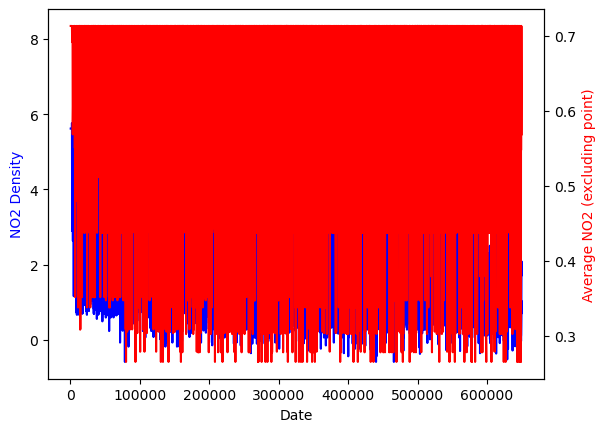

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,index_right,NO2_density,avg_NO2_excl_point
314,65.8626,107.7753,471.7,2.2,1.4,2020-06-30,543,Terra,MODIS,94,6.03,320.1,3227.8,D,0,0,5.616683,0.712793
2060,65.8782,107.6870,392.9,4.2,1.9,2020-06-30,1209,Terra,MODIS,100,6.03,294.8,1648.2,D,0,0,5.616480,0.712709
2110,62.1103,134.5643,500.0,1.0,1.0,2020-06-30,227,Terra,MODIS,100,6.03,356.8,1635.1,D,0,0,5.765207,0.712773
2406,62.4174,135.1207,496.8,1.0,1.0,2020-06-29,336,Aqua,MODIS,87,6.03,336.1,1544.6,D,0,0,2.890271,0.691211
2837,65.8795,107.6757,386.9,4.2,1.9,2020-06-30,1209,Terra,MODIS,87,6.03,291.7,1397.9,D,0,0,5.616480,0.712709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649703,65.8278,109.5552,361.0,3.3,1.7,2020-06-28,1221,Terra,MODIS,91,6.03,278.9,0.0,D,0,0,2.083259,0.626794
649738,67.3921,132.2836,500.0,1.0,1.0,2020-06-21,1214,Terra,MODIS,100,6.03,308.4,0.0,D,0,0,2.044288,0.568377
649740,67.3956,132.3054,500.0,1.0,1.0,2020-06-21,1214,Terra,MODIS,100,6.03,330.4,0.0,D,0,0,1.991494,0.568377
649745,67.4004,132.2743,420.4,1.0,1.0,2020-06-21,1214,Terra,MODIS,100,6.03,286.9,0.0,D,0,0,1.717383,0.568381


In [41]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

df = final_df.copy()
ax1.plot(df.index, df['NO2_density'], color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('NO2 Density', color='blue')

ax2 = ax1.twinx()

ax2.plot(df.index, df['avg_NO2_excl_point'], color='red')
ax2.set_xlabel('Index')
ax2.set_ylabel('Average NO2 (excluding point)', color='red')

# Show the plot
plt.show()
final_df

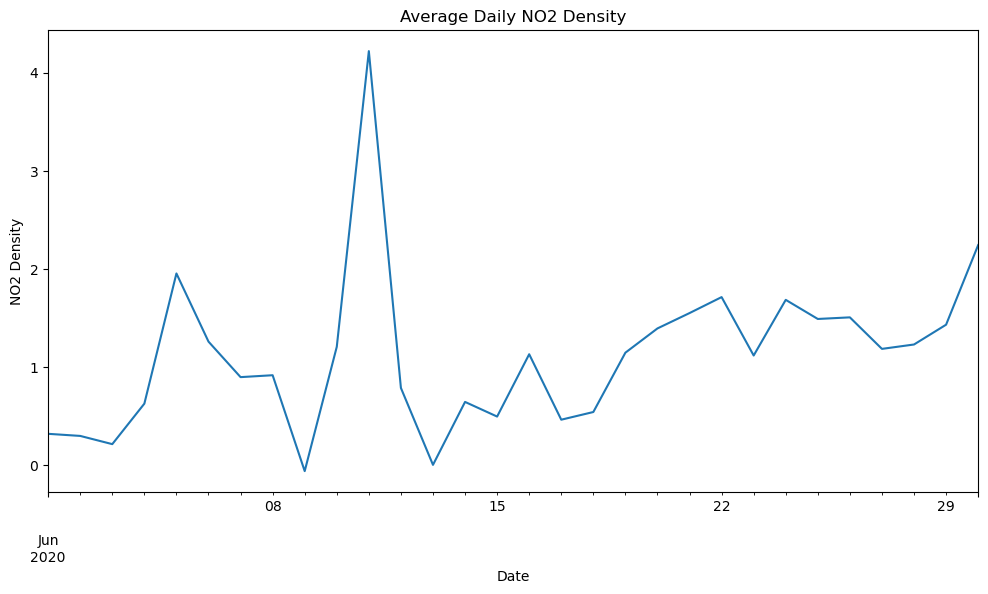

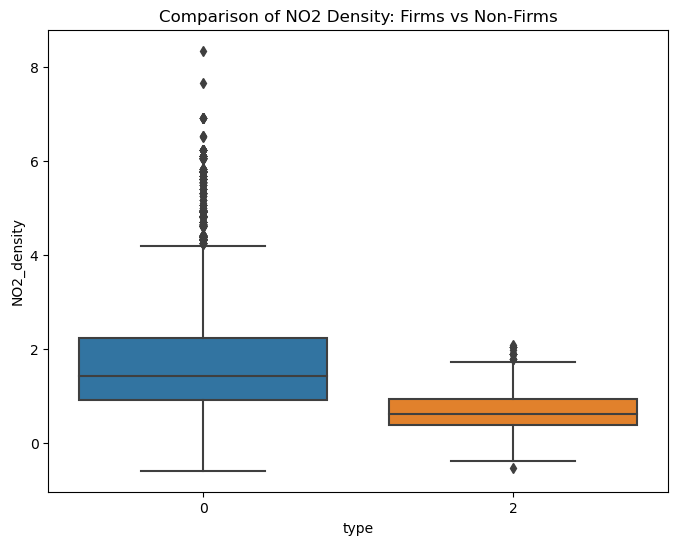

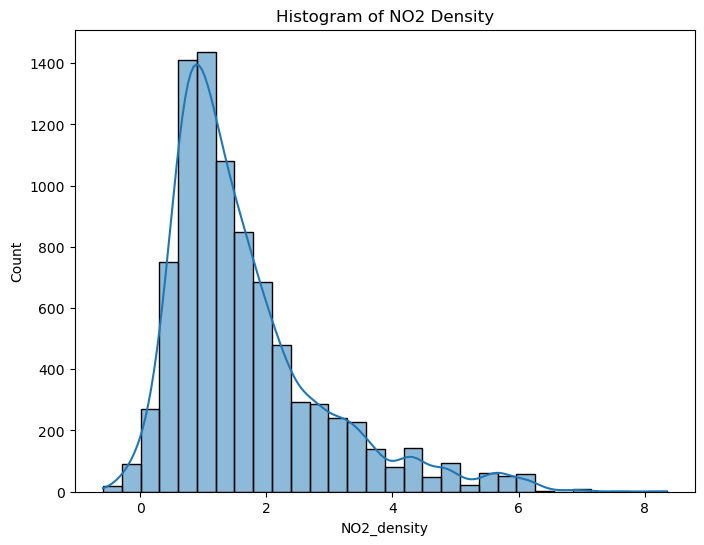

In [42]:
df = final_df.copy()
import seaborn as sns
plt.figure(figsize=(12, 6))
df.groupby('acq_date')['NO2_density'].mean().plot(title='Average Daily NO2 Density')
plt.xlabel('Date')
plt.ylabel('NO2 Density')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='NO2_density', data=df)
plt.title('Comparison of NO2 Density: Firms vs Non-Firms')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['NO2_density'], kde=True, bins=30)
plt.title('Histogram of NO2 Density')
plt.show()

In [43]:
import xarray as xr
import pandas as pd

df = ds.to_dataframe().reset_index()

df['time'] = pd.to_datetime(df['time'])
df_no2 = df[['time', 'latitude', 'longitude', 'tropospheric_NO2_column_number_density']]
df_no2 = df_no2.dropna()

In [44]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
df_no2['anomaly'] = iso_forest.fit_predict(df_no2[['tropospheric_NO2_column_number_density']])

/home/prasad/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [36]:
df_no2

,time,latitude,longitude,tropospheric_NO2_column_number_density,anomaly
89,2020-06-01,52.525002,106.824997,-0.001336,1
90,2020-06-01,52.525002,106.875000,-0.001336,1
91,2020-06-01,52.525002,106.925003,-0.001336,1
92,2020-06-01,52.525002,106.974998,-0.001336,1
260,2020-06-01,52.525002,115.375000,0.464933,1
...,...,...,...,...,...
5884315,2020-06-30,67.425003,134.925003,0.318293,1
5884316,2020-06-30,67.425003,134.975006,0.334130,1
5884317,2020-06-30,67.425003,135.024994,0.347761,1
5884318,2020-06-30,67.425003,135.074997,0.436658,1


/tmp/ipykernel_1591992/3619056242.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


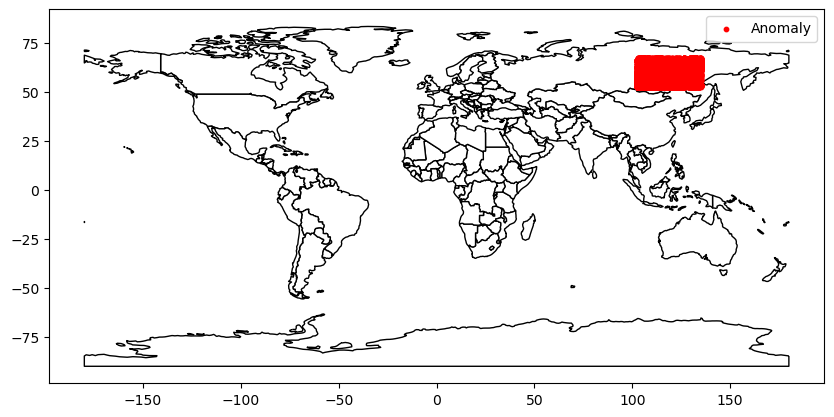

In [34]:
import geopandas as gpd
import matplotlib.pyplot as plt

gdf = gpd.GeoDataFrame(df_no2, geometry=gpd.points_from_xy(df_no2.longitude, df_no2.latitude))

fig, ax = plt.subplots(figsize=(10, 10))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='white', edgecolor='black')
gdf[gdf['anomaly'] == -1].plot(ax=ax, markersize=10, color='red', label='Anomaly')
plt.legend()
plt.show()

In [35]:
# Assuming df_firms has columns latitude and longitude
gdf_firms = gpd.GeoDataFrame(final_df, geometry=gpd.points_from_xy(final_df.longitude, final_df.latitude))

# Spatial join to find anomalies close to firms
anomalies_near_firms = gpd.sjoin(gdf[gdf['anomaly'] == -1], gdf_firms, how='inner', op='intersects')
print(f"Anomalies near firms: {anomalies_near_firms.shape[0]}")


/home/prasad/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


ValueError: 'index_left' and 'index_right' cannot be names in the frames being joined